# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [2]:
### Ваш код здесь ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [3]:
### Ваш код здесь ###
data = pd.read_csv("data.csv")

In [4]:
data.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [55]:
### Ваш код здесь ###
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1515.463699,1.947945,472.980137,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,20.645407,438.705324,525.480383,0.794965,213.804841,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,795.750000,1129.500000,1.000000,334.500000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1464.000000,2.000000,480.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1776.750000,3.000000,576.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,5642.000000,4.000000,1418.000000,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

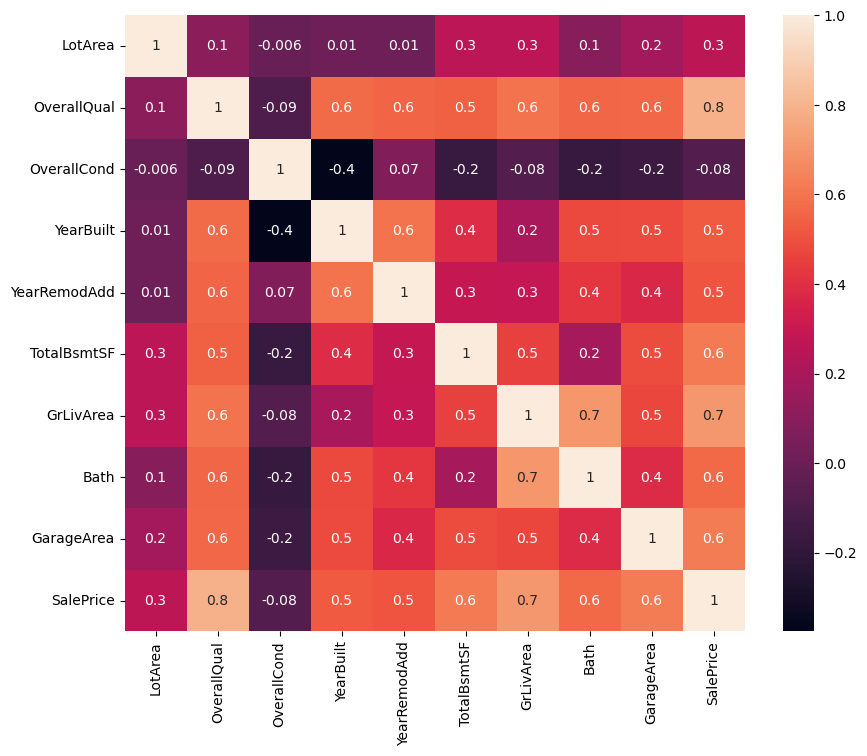

In [56]:
### Ваш код здесь ###
fig = plt.figure(figsize=(10, 8))
sns.heatmap(
    data[numerical_columns].corr(),
    annot=True,
    fmt='.1g'
    );

In [45]:
del_col = ['LotArea_M', "GarageArea_M", 'GrLivArea_M','TotalBsmtSF_M']
data.drop(del_col, axis=1, inplace=True)

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [ ]:
### Ваш код здесь ###
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

target_column = 'SalePrice'
#sns.pairplot(data[numerical_columns])
for col in numerical_columns:
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x=data[col], y=data[target_column])
    ax.set(
        xlabel=col,
        ylabel=target_column)

4. Сделайте предварительные выводы.

Заметим, что SalePrice коррелирует от OverallQual, GriLivArea, YearBuilt, YearRemodAdd, Bath, GarageArea

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [ ]:
### Ваш код здесь ###

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [57]:
### Ваш код здесь ###
X = data.drop(target_column, axis=1).copy()
y = data[target_column].copy()


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 135 to 1126
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1022 non-null   int64 
 1   Street         1022 non-null   object
 2   BldgType       1022 non-null   object
 3   OverallQual    1022 non-null   int64 
 4   OverallCond    1022 non-null   int64 
 5   YearBuilt      1022 non-null   int64 
 6   YearRemodAdd   1022 non-null   int64 
 7   RoofStyle      1022 non-null   object
 8   ExterQual      1022 non-null   object
 9   ExterCond      1022 non-null   object
 10  Foundation     1022 non-null   object
 11  TotalBsmtSF    1022 non-null   int64 
 12  Heating        1022 non-null   object
 13  HeatingQC      1022 non-null   object
 14  CentralAir     1022 non-null   object
 15  GrLivArea      1022 non-null   int64 
 16  Bath           1022 non-null   int64 
 17  KitchenQual    1022 non-null   object
 18  GarageArea     1022 non-null   

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [62]:
### Ваш код здесь ###
cat_features = X_train.select_dtypes(include='O').columns
num_columns = X_train.select_dtypes(include='int64').columns


In [64]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_train[cat_features])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_features])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_features])
X_train.drop(cat_features, axis=1, inplace=True)
X_test.drop(cat_features, axis=1, inplace=True)


3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [ ]:
### Ваш код здесь ###
scaler = StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [82]:
### Ваш код здесь ###
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def metric_model(y_true, y_pred):
    print(f"MAE = {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE = {mean_squared_error(y_true, y_pred)}")
    print(f"R2 = {r2_score(y_true, y_pred)}")
    

In [81]:
pred_lin_reg = lin_reg.predict(X_test)
metric_model(y_test, pred_lin_reg)

MAE = 22414.68493150685
MSE = 1181846348.497717
R2 = 0.8306347852312849


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [84]:
### Ваш код здесь ###
coef = []

for i in range(-4, 5):
    alpha = 10 ** i
    lasso_reg = Lasso(alpha=alpha, max_iter=1000, random_state=42)
    lasso_reg.fit(X_train, y_train)
    coef.append(list(lasso_reg.coef_))
    
    print(f"lambda = {alpha}")
    print(lasso_reg.score(X_train, y_train))
    print(lasso_reg.score(X_test, y_test))
    

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.856e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.856e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

lambda = 0.0001
0.8114380910705213
0.8306552625506536
lambda = 0.001
0.8114380910680374
0.8306554802417688
lambda = 0.01
0.8114380908194287
0.8306575909335794
lambda = 0.1
0.8114380655086786
0.8306796357501511
lambda = 1
0.8114355403403508
0.8308853890454917
lambda = 10
0.8112341847627023
0.8327964602315419
lambda = 100
0.804361914900557
0.8403196405655884
lambda = 1000
0.7868517779086561
0.8293160894526981
lambda = 10000
0.7176330603701695
0.7470206602821605


Посмотрите на веса полученной модели. Какой вывод можно сделать?

<Axes: >

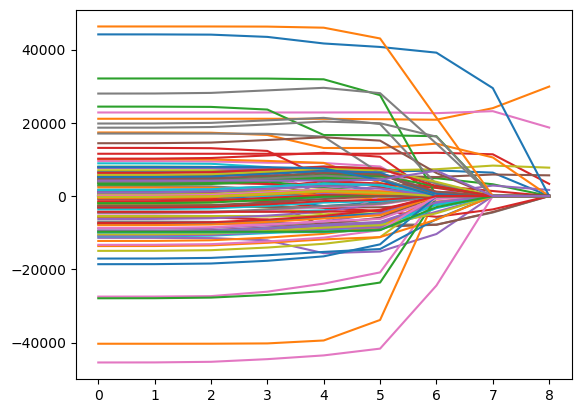

In [90]:
coef_df = pd.DataFrame(coef, columns=X_train.columns)
coef_df.plot(legend=False)

In [94]:
coef_df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,Street_Grvl,...,DateSold_9/2006,DateSold_9/2007,DateSold_9/2008,DateSold_9/2009,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6613.761834,21098.384927,5372.498583,11543.773688,586.124055,5616.501036,22817.108852,1219.263822,7043.917289,-4268.823862,...,-2675.115040,-13326.584737,3924.952398,-290.834684,-9918.391716,7915.882168,46301.916482,-9754.161060,-4305.799645,4208.010298
1,6613.760100,21098.372980,5372.487591,11543.770169,586.127979,5616.503613,22817.101396,1219.268461,7043.910087,-4268.515688,...,-2658.436453,-13309.785846,3941.462750,-274.152496,-9918.329825,7915.572376,46301.600873,-9754.125683,-4305.770533,4208.030448
2,6613.740622,21098.252747,5372.388427,11543.724878,586.168321,5616.528323,22817.032080,1219.309600,7043.832871,-4265.400839,...,-2491.670427,-13141.832971,4106.542650,-107.322375,-9917.714455,7912.490031,46298.517781,-9753.751007,-4305.476661,4208.228480
3,6613.550296,21097.087686,5371.353609,11543.266999,586.683233,5616.628394,22816.339337,1219.669848,7042.970863,-4234.841229,...,-1775.034851,-12413.361843,4805.976625,592.315431,-9911.498503,7881.282463,46267.295353,-9750.147177,-4302.815456,4210.490344
4,6612.355083,21084.574174,5365.475676,11547.398335,593.627363,5610.685240,22818.870817,1216.362625,7037.496019,-3913.612575,...,-830.100591,-11365.979481,5565.086685,1382.730663,-9848.800820,7528.865396,45971.469662,-9710.509155,-4274.583523,4231.501783
5,6616.621320,20975.961876,5294.653296,11545.945159,651.947952,5555.367047,22838.607532,1196.789439,7011.967033,-981.209949,...,-0.000000,-9330.151609,4796.679304,892.318377,-9278.958698,4366.795593,43027.602347,-9298.296867,-3996.071070,4443.841912
6,6994.676077,20834.380611,4873.524413,11813.821917,772.473471,5178.982781,22625.650763,1115.986756,7317.234429,-0.000000,...,-0.000000,-0.000000,0.000000,0.000000,-3309.174091,0.000000,21374.359076,-3023.625743,-0.000000,6923.747823
7,6388.722299,23997.213323,3210.351506,11393.385776,2862.719808,5872.092882,23173.841505,0.000000,8313.400593,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
8,0.000000,29892.605993,0.000000,3318.417726,1654.674576,5648.636935,18698.437817,0.000000,7745.803576,0.000000,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000


3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [113]:
### Ваш код здесь ###

### Ваш код здесь ###

score = []

for i in range(-4, 5):
    alpha = 10 ** i
    ridge_reg = Ridge(alpha=alpha, max_iter=1000, random_state=42)
    ridge_reg.fit(X_train, y_train)
    
    #print(f"lambda = {alpha}")
    #print(ridge_reg.score(X_train, y_train))
    score.append((alpha, ridge_reg.score(X_test, y_test)))
    #print(ridge_reg.score(X_test, y_test))
    
print(max(score, key=lambda x: x[1]))
best_alpha = max(score, key=lambda x: x[1])[0]

(10, 0.841471612419054)


10

In [114]:
ridge_reg = Ridge(alpha=best_alpha, max_iter=1000, random_state=42)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10, max_iter=1000, random_state=42)

Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [116]:
pd.DataFrame({'feateures': X_train.columns,"coef": ridge_reg.coef_}).sort_values(by='coef', ascending=False)

,feateures,coef
50,KitchenQual_Ex,27180.465349
6,GrLivArea,22095.897667
1,OverallQual,21158.264368
97,DateSold_7/2007,15212.785120
22,ExterQual_Ex,13590.278486
...,...,...
52,KitchenQual_Gd,-8271.895437
25,ExterQual_TA,-10511.013384
14,BldgType_Twnhs,-10933.098314
53,KitchenQual_TA,-12905.769212


## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 